<a href="https://colab.research.google.com/github/maxrgnt/pythdc2-project2/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Panel Data
import pandas as pd
# System folders
import os
from pathlib import Path
# Visualization
import plotly.graph_objs as go
import seaborn as sns
%matplotlib inline

In [8]:
# read in the data
url='https://raw.githubusercontent.com/maxrgnt/pythdc2-project2/master/data/borderCrossing.csv'
df = pd.read_csv(url)
df.sample(3)

,Abrv,State,Longitude,Latitude,Border,Date,Measure,Value
91349,MT,Montana,-111.26,49.00,US-Canada Border,11/1/2000 0:00,Personal Vehicle Passengers,110
33290,AZ,Arizona,-114.78,32.49,US-Mexico Border,11/1/2011 0:00,Pedestrians,286686
29219,MT,Montana,-111.96,49.00,US-Canada Border,8/1/2012 0:00,Bus Passengers,571


In [9]:
# are there any null values?
df.isnull().sum()

Abrv         0
State        0
Longitude    0
Latitude     0
Border       0
Date         0
Measure      0
Value        0
dtype: int64

In [0]:
# Handle the Date column
df['newDate'] = pd.to_datetime(df['Date'])

In [11]:
# Inspect the date column
df['Year'] = df['newDate'].dt.year
df['Month'] = df['newDate'].dt.month
# How many years of data available?
maxYear = df['newDate'].dt.year.max()
minYear = df['newDate'].dt.year.min()
print(f'From {minYear} to {maxYear} for total of {maxYear-minYear} year(s) of data.')

From 1996 to 2019 for total of 23 year(s) of data.


In [0]:
# df.groupby(['Border','Year'])[['Value']].sum().head()
# df = df.sample(10000)
# df2 = df.groupby('StateAbrv')[['Value']].sum().reset_index()
# df2.head()

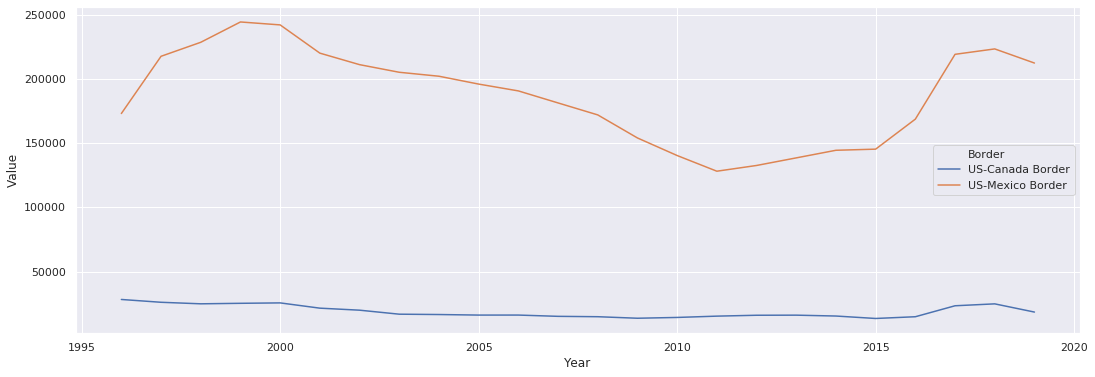

In [14]:
sns.set(rc={'figure.figsize':(18,6)})
sns.lineplot(x = 'Year', y = 'Value', hue = 'Border', ci=None, data = df);

In [0]:
# mapbox_access_token = open("assets/mytoken.mapbox_token").read()

# fig = go.Figure(go.Scattermapbox(
#     lat=df['Latitude'],
#     lon=df['Longitude'],
#     mode='markers',
#     marker=go.scattermapbox.Marker(
#         size=20,
#         colorscale='Purples',
#         color=df['Value']
#     ),
#     text=df['Value']

# ))
# fig.update_layout(
#     autosize=True,
#     hovermode='closest',
#     mapbox=go.layout.Mapbox(
#         accesstoken=mapbox_access_token,
#         bearing=0,
#         center=go.layout.mapbox.Center(
#             lat=39.8283,
#             lon=-98.5795
#         ),
#         pitch=0,
#         zoom=3
#     ),
# )
# fig

In [0]:
fig = go.Figure(data=go.Choropleth(
    locations=df2['StateAbrv'], # Spatial coordinates
    z = df2['Value'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Purples',
    colorbar_title = "Pedestrians",
))

fig.update_layout(
    title_text = 'Migration',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [17]:
brdr = df[["Abrv","Year","Value"]]
brdr = brdr[brdr['Abrv']=='TX']
brdr = brdr.groupby(['Year','Abrv'])[['Value']].sum().reset_index()

url='https://raw.githubusercontent.com/maxrgnt/pythdc2-project2/master/data/pctChangeGDP.csv# read in the data'
gdp_raw = pd.read_csv(url)
gdp_raw.sample(2)

,State,Abrv,Year,Value
399,New York,NY,1990,4.2
176,Ohio,OH,1975,5.3


In [0]:
gdp = gdp_raw[gdp_raw['Abrv']=='TX'].reset_index()

In [20]:
print(f'GDP shape: {gdp.shape}')
print(f'Border crossing shape: {brdr.shape}')

GDP shape: (55, 5)
Border crossing shape: (24, 3)


In [21]:
print(f'Border crossing goes from {brdr["Year"].min()} to {brdr["Year"].max()}')
print(f'GDP goes from {gdp["Year"].min()} to {gdp["Year"].max()}')

Border crossing goes from 1996 to 2019
GDP goes from 1964 to 2018


In [0]:
gdp = gdp[gdp['Year'].astype(int)>1996]
brdr = brdr[brdr['Year'].astype(int)<2019]

In [23]:
print(f'Border crossing goes from {brdr["Year"].min()} to {brdr["Year"].max()}')
print(f'GDP goes from {gdp["Year"].min()} to {gdp["Year"].max()}')

Border crossing goes from 1996 to 2018
GDP goes from 1997 to 2018


In [0]:
gdp.rename(columns={'Value':'gdp'}, inplace=True)
brdr.rename(columns={'Value':'immigrants'}, inplace=True)

In [25]:
gdp.head(3)

,index,State,Abrv,Year,gdp
33,507,Texas,TX,1997,10.1
34,522,Texas,TX,1998,5.8
35,537,Texas,TX,1999,5.5


In [0]:
brdr['immigrants'] = brdr['immigrants'].astype(float)

In [0]:
for y in list(brdr['Year'].unique()):
  blah = 1.0
  if y != brdr['Year'].min():
    t0 = brdr.loc[brdr['Year'] == y-1,'immigrants'].tolist()[0]
    t1 = brdr.loc[brdr['Year'] == y,'immigrants'].tolist()[0]
    brdr.loc[brdr['Year'] == y, 'pct'] = (1-t1/t0)*100
brdr = brdr[brdr['Year'].astype(int)>brdr['Year'].min()]

In [28]:
print(brdr)
print(gdp)

    Year Abrv   immigrants        pct
1   1997   TX  144112883.0  -5.411652
2   1998   TX  150696714.0  -4.568524
3   1999   TX  163180976.0  -8.284362
4   2000   TX  158331350.0   2.971931
5   2001   TX  139030419.0  12.190214
6   2002   TX  125895151.0   9.447766
7   2003   TX  119902414.0   4.760102
8   2004   TX  120122963.0  -0.183940
9   2005   TX  115806714.0   3.593192
10  2006   TX  112021593.0   3.268481
11  2007   TX  107147439.0   4.351084
12  2008   TX  105485182.0   1.551374
13  2009   TX   92676707.0  12.142440
14  2010   TX   82225341.0  11.277231
15  2011   TX   70242948.0  14.572628
16  2012   TX   72898341.0  -3.780298
17  2013   TX   76715712.0  -5.236568
18  2014   TX   80334766.0  -4.717487
19  2015   TX   82726100.0  -2.976711
20  2016   TX   85714503.0  -3.612406
21  2017   TX   86196612.0  -0.562459
22  2018   TX   88404201.0  -2.561109
    index  State Abrv  Year   gdp
33    507  Texas   TX  1997  10.1
34    522  Texas   TX  1998   5.8
35    537  Texas   TX  1

In [0]:
gdp['Year'] = gdp['Year'].astype(int)
new = gdp.merge(brdr, how = 'left', left_on='Year', right_on='Year',sort=True)

In [48]:
new.sample(1)

,index,State,Abrv_x,Year,gdp,Abrv_y,immigrants,pct
0,507,Texas,TX,1997,10.1,TX,144112883.0,-5.411652


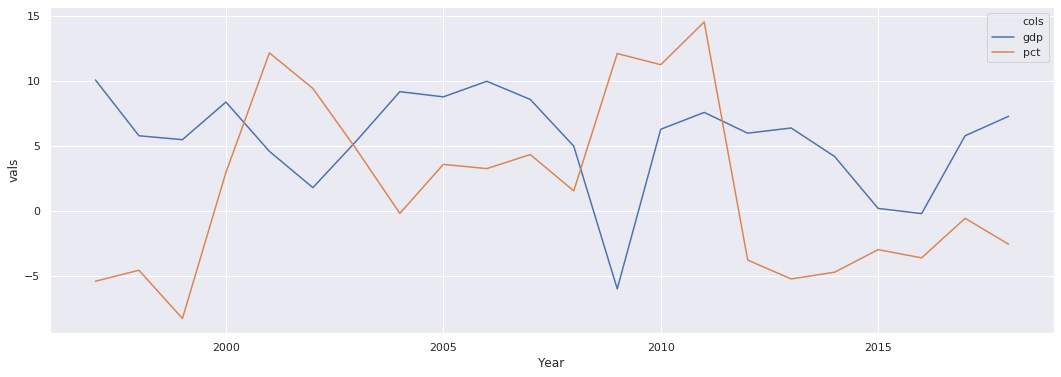

In [49]:
new2 = new.melt(['index','Abrv_x','Year','Abrv_y','immigrants','State'], var_name='cols', value_name='vals')
sns.set(rc={'figure.figsize':(18,6)})
sns.lineplot(x = 'Year', y = 'vals', hue='cols', ci=None, data = new2);

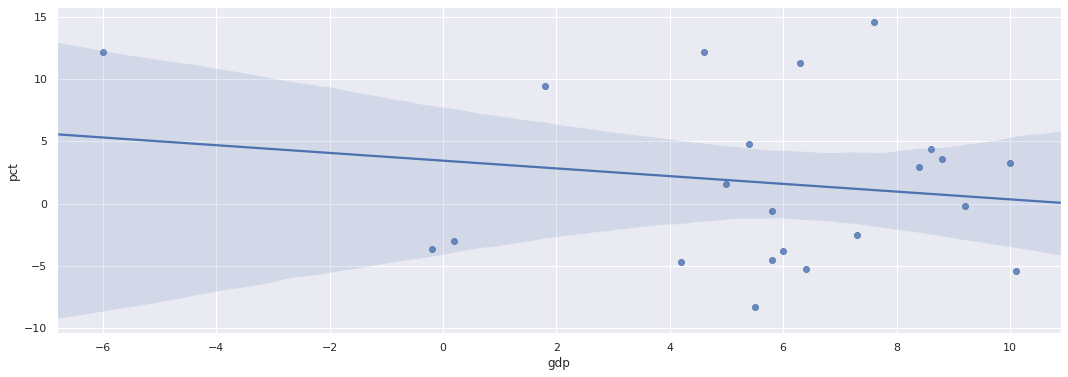

In [51]:
sns.regplot(x = 'gdp', y = 'pct', data = new, );